# Deep Learning - RNN ( Not Finished )

In this section, RNN is used to forecast the apple prices.

## ⚠️ Disclaimer

> This project is created **for educational and research purposes only**.  
> It does **not** constitute investment advice, financial recommendations, or a solicitation to buy or sell any securities.
>
> All data is sourced from [Yahoo Finance](https://finance.yahoo.com/) using the `yfinance` Python package.  
> This project is **not affiliated with, endorsed by, officially connected to Apple Inc.** or Yahoo Finance in any way. in any way.

In [1]:
#Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
apple_df = yf.Ticker("AAPL").history(
    start="2020-03-30",
    end="2025-03-29",
    interval="1d"
)
apple_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-30 00:00:00-04:00,60.849346,62.009351,60.524153,61.837048,167976400,0.0,0.0
2020-03-31 00:00:00-04:00,62.028759,63.700813,61.155113,61.710846,197002000,0.0,0.0
2020-04-01 00:00:00-04:00,59.820377,60.359125,58.031834,58.463802,176218400,0.0,0.0
2020-04-02 00:00:00-04:00,58.325477,59.492763,57.490661,59.439373,165934000,0.0,0.0
2020-04-03 00:00:00-04:00,58.922460,59.626228,57.992999,58.585136,129880000,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-24 00:00:00-04:00,221.000000,221.479996,218.580002,220.729996,44299500,0.0,0.0
2025-03-25 00:00:00-04:00,220.770004,224.100006,220.080002,223.750000,34493600,0.0,0.0
2025-03-26 00:00:00-04:00,223.509995,225.020004,220.470001,221.529999,34466100,0.0,0.0


# Preprocessing

In [3]:
#Dividing date to year, month and day columns, and resetting index
apple_df.index = pd.to_datetime(apple_df.index)
apple_df["Day_of_Week"] = apple_df.index.dayofweek
apple_df["Year"] = apple_df.index.year
apple_df["Month"] = apple_df.index.month
apple_df["Day"] = apple_df.index.day
apple_df = apple_df.reset_index(drop=True)

In [4]:
#Creating lags for Close price
for lag in range(1, 62):
    apple_df[f"Close_lag_{lag}"] = apple_df["Close"].shift(lag)

In [5]:
#Getting to moving averages of previous days
apple_df["Previous_MA_5"] = apple_df["Close"].rolling(window=5).mean()
apple_df["Previous_MA_20"] = apple_df["Close"].rolling(window=20).mean()
apple_df["Previous_MA_ratio"] = apple_df["Previous_MA_5"] / apple_df["Previous_MA_20"]
apple_df.drop(columns=["Dividends","Stock Splits"],inplace=True)
apple_df.dropna(inplace=True)

In [6]:
apple_df

,Open,High,Low,Close,Volume,Day_of_Week,Year,Month,Day,Close_lag_1,...,Close_lag_55,Close_lag_56,Close_lag_57,Close_lag_58,Close_lag_59,Close_lag_60,Close_lag_61,Previous_MA_5,Previous_MA_20,Previous_MA_ratio
61,87.771287,88.817629,87.009644,88.778694,137522400,3,2020,6,25,87.615532,...,62.958221,63.695957,58.585136,59.439373,58.463802,61.710846,61.837048,87.601917,83.287448,1.051802
62,88.674065,88.895502,85.902465,86.050903,205256800,4,2020,6,26,88.778694,...,64.569603,62.958221,63.695957,58.585136,59.439373,58.463802,61.710846,87.792207,83.721682,1.048620
63,85.958425,88.128985,85.479053,88.034081,130646000,0,2020,6,29,86.050903,...,65.035530,64.569603,62.958221,63.695957,58.585136,59.439373,58.463802,87.933830,84.207501,1.044252
64,87.620413,89.056101,87.600949,88.768959,140223200,1,2020,6,30,88.034081,...,66.312042,65.035530,64.569603,62.958221,63.695957,58.585136,59.439373,87.849634,84.711937,1.037040
65,88.846831,89.391901,88.552396,88.601059,110737200,2,2020,7,1,88.768959,...,69.661003,66.312042,65.035530,64.569603,62.958221,63.695957,58.585136,88.046739,85.186322,1.033578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,221.000000,221.479996,218.580002,220.729996,44299500,0,2025,3,24,218.270004,...,250.144974,251.923019,255.309296,258.735504,257.916443,254.989655,254.210510,216.206003,226.707000,0.953680
1253,220.770004,224.100006,220.080002,223.750000,34493600,1,2025,3,25,220.729996,...,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443,254.989655,218.418002,225.542500,0.968412
1254,223.509995,225.020004,220.470001,221.529999,34466100,2,2025,3,26,223.750000,...,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,257.916443,219.676001,224.601000,0.978072
1255,221.389999,224.990005,220.559998,223.850006,37094800,3,2025,3,27,221.529999,...,244.730927,243.092728,243.582199,250.144974,251.923019,255.309296,258.735504,221.626001,223.928500,0.989718


## Functions

In [7]:
def create_sequences(data: np.ndarray, seq_length: int):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

In [8]:
def train_val_test_split(X: np.ndarray, y: np.ndarray,
                         train_ratio: float = 0.8,
                         val_ratio: float = 0.10):

    total = len(X)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    X_train, y_train = X[:train_end], y[:train_end]
    X_val, y_val = X[train_end:val_end], y[train_end:val_end]
    X_test, y_test = X[val_end:], y[val_end:]

    return X_train, y_train, X_val, y_val, X_test, y_test

In [9]:
def prepare_rnn_data(df: pd.DataFrame,
                     target_col: str = 'Close',
                     use_all_features: bool = False,
                     seq_length: int = 60):

    y_values = df[target_col].values

    if use_all_features:
        X_raw = df.values
    else:
        X_raw = df[[target_col]].values

    X_seq, y_seq = create_sequences(X_raw, seq_length)
    y_seq = y_values[seq_length:]

    return train_val_test_split(X_seq, y_seq)

In [10]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_rnn_data(
    apple_df,
    target_col='Close',
    use_all_features=False,
    seq_length=60
)

In [11]:
X_test

array([[[223.42906189],
        [223.55862427],
        [223.20980835],
        ...,
        [225.27420044],
        [229.03591919],
        [228.53701782]],

       [[223.55862427],
        [223.20980835],
        [224.25628662],
        ...,
        [229.03591919],
        [228.53701782],
        [227.05029297]],

       [[223.20980835],
        [224.25628662],
        [217.80795288],
        ...,
        [228.53701782],
        [227.05029297],
        [230.79205322]],

       ...,

       [[258.73550415],
        [255.30929565],
        [251.92301941],
        ...,
        [218.27000427],
        [220.72999573],
        [223.75      ]],

       [[255.30929565],
        [251.92301941],
        [250.14497375],
        ...,
        [220.72999573],
        [223.75      ],
        [221.52999878]],

       [[251.92301941],
        [250.14497375],
        [243.5821991 ],
        ...,
        [223.75      ],
        [221.52999878],
        [223.8500061 ]]])

In [12]:
y_test

array([227.05029297, 230.79205322, 233.3364563 , 231.27099609,
       231.6401825 , 234.48391724, 235.9606781 , 235.34204102,
       230.25323486, 230.06367493, 230.90180969, 232.88743591,
       233.15684509, 229.59468079, 225.41389465, 222.42047119,
       221.52244568, 222.95928955, 222.230896  , 226.98043823,
       226.71073914, 223.98373413, 223.98373413, 224.87275696,
       227.96936035, 224.75288391, 227.76957703, 228.02928162,
       228.74848938, 228.26902771, 229.61753845, 232.61424255,
       234.80183411, 234.67198181, 237.0693512 , 239.32685852,
       242.38349915, 242.74310303, 242.77307129, 242.57328796,
       246.47900391, 247.49787903, 246.21928406, 247.68768311,
       247.85748291, 250.76428223, 253.20159912, 247.77757263,
       249.51565552, 254.21051025, 254.98965454, 257.91644287,
       258.73550415, 255.30929565, 251.92301941, 250.14497375,
       243.5821991 , 243.09272766, 244.73092651, 241.94400024,
       242.43344116, 236.58987427, 234.14256287, 233.02

In [13]:
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (908, 60, 1)
Val shape: (113, 60, 1)
Test shape: (115, 60, 1)


## Scaler

In [14]:
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = x_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = x_scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = x_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [15]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

# RNN Models, Only Close Feature

In [16]:
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model_RNN_1 = Sequential(
    [
        SimpleRNN(units=64, return_sequences=True,input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
        Dropout(0.2),
        SimpleRNN(units=32),
        Dropout(0.2),
        Dense(1)
    ]
)

model_RNN_1.compile(optimizer='adam',loss='mse',metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
history = model_RNN_1.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

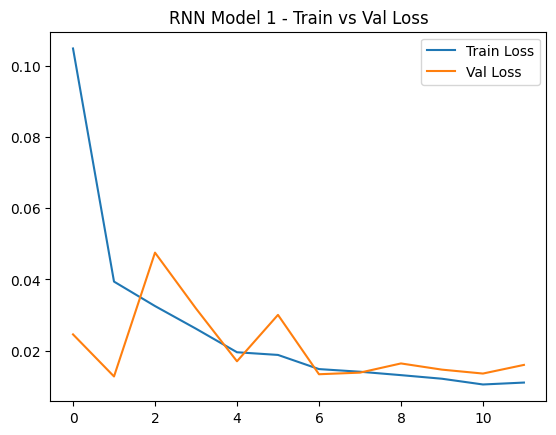

In [20]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Model 1 - Train vs Val Loss')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [22]:
y_pred = y_scaler.inverse_transform(model_RNN_1.predict(X_test_scaled))
y_test_orig = y_scaler.inverse_transform(y_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step


In [23]:
r2= r2_score(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
print(f"R^2 is {r2} \n RMSE is {rmse} \n MAPE is {mape}")

R^2 is -2.954238790344595 
 RMSE is 21.39951111357105 
 MAPE is 0.08047127563552059


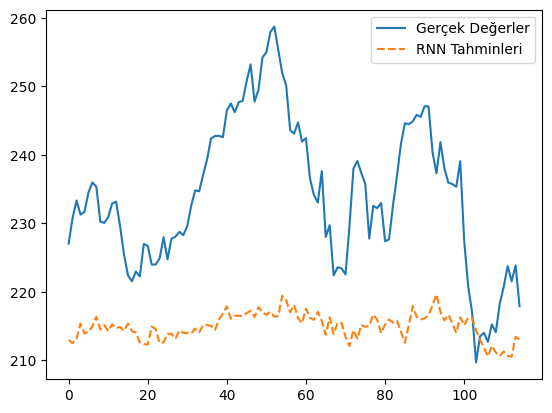

In [24]:
plt.plot(y_test_orig, label='Gerçek Değerler')
plt.plot(y_pred, label='RNN Tahminleri', linestyle='--')
plt.legend()
plt.show()

In [25]:
from tensorflow.keras.layers import BatchNormalization

model_RNN_2 = Sequential([
    SimpleRNN(units=128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=64, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),

    SimpleRNN(units=32),
    Dropout(0.3),

    Dense(16, activation='relu'),
    Dense(1)
])

model_RNN_2.compile(optimizer='adam', loss='mse', metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
history = model_RNN_2.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

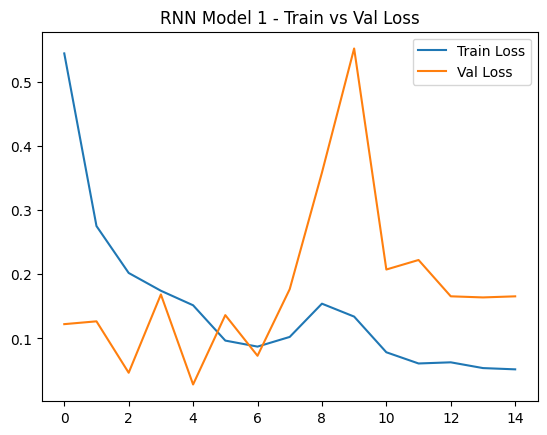

In [27]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Model 1 - Train vs Val Loss')
plt.legend()
plt.show()

In [28]:
y_pred = y_scaler.inverse_transform(model_RNN_1.predict(X_test_scaled))
y_test_orig = y_scaler.inverse_transform(y_test_scaled)
r2= r2_score(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
print(f"R^2 is {r2} \n RMSE is {rmse} \n MAPE is {mape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
R^2 is -2.954238790344595 
 RMSE is 21.39951111357105 
 MAPE is 0.08047127563552059


# RNN, All Features

In [29]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_rnn_data(
    apple_df,
    target_col='Close',
    use_all_features=True,
    seq_length=60
)

In [30]:
x_scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = x_scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = x_scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = x_scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [31]:
y_scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

In [57]:
model_RNN_1 = Sequential(
    [
        SimpleRNN(units=128, return_sequences=True,input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
        Dropout(0.3),
        SimpleRNN(units=64),
        Dropout(0.2),
        Dense(1)
    ]
)

model_RNN_1.compile(optimizer='adam',loss='mse',metrics=['mse'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
history = model_RNN_1.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_val_scaled, y_val_scaled),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

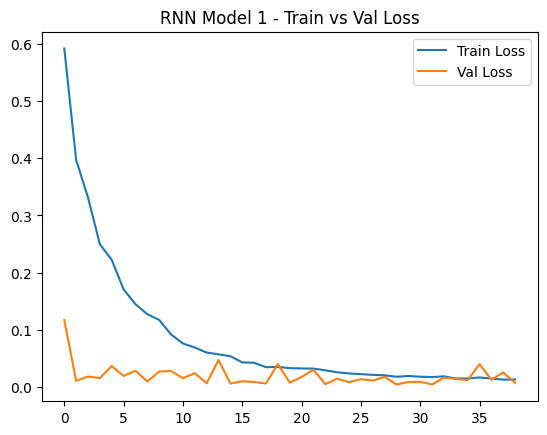

In [59]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('RNN Model 1 - Train vs Val Loss')
plt.legend()
plt.show()

In [60]:
y_pred = y_scaler.inverse_transform(model_RNN_1.predict(X_test_scaled))
y_test_orig = y_scaler.inverse_transform(y_test_scaled)
r2= r2_score(y_test_orig, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred))
mape = mean_absolute_percentage_error(y_test_orig, y_pred)
print(f"R^2 is {r2} \n RMSE is {rmse} \n MAPE is {mape}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step
R^2 is -0.19932105857838378 
 RMSE is 11.785286246845185 
 MAPE is 0.04268132223157412
